This notebook is for the evaluation of algorithm in machine learning course at ISAE-SUPAERO, written by Ziqing WU.


<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Extremely Randomized Trees</div>


0. [Preliminary - Brief recall of decision tree and bagging](#sec0) 
1. [Introduction](#sec1)
2. [Algorithm](#sec2)
3. [Illustrations](#sec3)
4. [Examples](#sec4)
    1. [Spam or ham?](#sec4-1)
    2. [NIST](#sec4-2)
5. [Important facts to remember](#sec5)
6. [More about parameter regularization (optional)](#sec6)

# <a id="sec0"></a> 0. Preliminary - Brief recall of decision tree and bagging
The extremely randomized trees algorithm is a tree-based ensemble method to solve supervised classification and regression problems.

To get a thorough understanding of this method, the knowledge of decision tree and bagging that we have covered in class is necessary. In this section, a brief recall of these two concepts is provided. You may skip it if you feel completely comfortable with decision trees and bagging idea. 

## 0.1 Decision Tree

Decision Tree is the hierarchical description of data based on logical (binary) questions. Based on the decision tree, several algorithms are proposed to solve classification or regression problems. They are greedy, top-down, recursive, partitioning. Here CART (Classification And Regression Trees) algorithm for classification is taken as an example. [[Rutkowski, 2014](https://www.sciencedirect.com/science/article/pii/S0020025514000206?casa_token=17o4ZXxeHmsAAAAA:XF-ClnEesKcyOCWN97d2g3RqryCxBm0gOw8qHNKirHzWj7MQQ-PB1EYVyHw70svyuzZ5T9nTXn0#s0010)]

+ The algorithm starts with a single node - the root.
+ During the learning process, in each created node, the particular subset of the training set is processed. If all elements of this set are of the same class, the node will be tagged as a leaf and the split is not made. 
+ If not, the best attribute to split is chosen according to split measure function.
+ The tree can be grown until the node is not split, meaning either the list of available attributes in the node contains only one element or all the elements of the subset are from the same class.

The impurity measure used in CART is Gini index. For any subset $S_q$, the fraction of all data elements in considered node from class k is denoted by $p_{k,q}$. The Gini index is given by $$Gini(S_q)=1-\sum_{k=1}^{K}(p_{k,q})^2$$

It reaches its minimum (zero) when all cases fall into a single target category, and its maximum when data is equally distributed among all classes. 

The weighted Gini index of $S_q$ is also introduced by $$wGini(S_q, A)=p_L Gini(L_q(A))+(1-p_L)Gini(R_q(A))$$ where $A$ is the split of $S_q$, $L_q$ and $R_q$ are the two subsets derived from $S_q$ and split $A$, $p_L$ is the fraction of data elements from $S_q$ which belongs to the subset $L_q$. The Gini index of two subsets $L_q$ and $R_q$ are also calculated to deduce the weighted Gini of $S_q$. 

With Gini index and weighted Gini index, we can define the split measure function, called Gini gain: $$g(S_q)=Gini(S_q)-wGini(S_q, A)$$

Then the optimal partition $\tilde A$ for which Gini gain reaches its maximum is chosen among all possible partitions, showing the greedy property of this algorithm. 

The other split measure function can be chosen, such as cross-entropy loss. Please refer to the its [Wikipedia page](https://en.wikipedia.org/wiki/Cross_entropy) for more information.

The advantages of decision tree are that it is quite easy to explain and interpret, relatively fast with time complexity proportional to the multiplication of the number of data points, number of features and the depth of the trees. It provides also possibilities to work with categorical variables. However, its disadvantages are quite obvious. Decision tree has high variance, meaning a small variation in data can result in a completely different tree. It can easily lead to overfitting by creating a too complex model. Greedy algorithms cannot guarantee to return the globally optimal decision tree.

## 0.2 Bagging

As we have seen in the decision trees, its high variance makes it difficult to provide an accurate prediction comparing to other algorithms. In 1990s, ensemble methods were put forward to combine the predictions of several base estimators built with a given learning algorithm. The objective is to improve the robustness over a single estimator. 

Two main families of ensemble methods are identified:
+ The averaging methods: Several independent estimators are built and then their estimations are averaged, the variance is reduced compared to single estimators. These methods work best with strong and complex models, such as fully developed decision trees. 
+ The boosting methods: base estimators are built sequentially with the objective to reduce the bias of the combined estimator. These methods are more adapted to weak models, such as shallow decision trees.

In this notebook, we are interested in the averaging methods, with a particular focus on extremely randomized trees. So we may ask what is the principle for the averaging methods? Here a bootstrap aggregating (bagging) idea will be introduced [[Brieman, 1996](https://link-springer-com.rev-doc.isae.fr/article/10.1007/BF00058655)].

A learning set of $\mathcal{L}$ consists of data $\{(y_n,\mathbf{x}_n), n = 1,...,N\}$ where $y_n$ is class label or a numerical response. Assume that a predictor $\varphi(x,\mathcal{L})$ is available to predict $y$ with the input $\mathbf{x}$. Suppose that we have a sequence of learning sets $\{\mathcal{L}_k\}$ each consisting of $N$ independent observations from the same underlying distribution as $\mathcal{L}$. The objective is to use the $\{\mathcal{L}_k\}$ to get a better predictor than the single learning set predictor $\varphi(x,\mathcal{L})$. The restriction is that we are only allowed to work with the sequence of predictors $\{\varphi(\mathbf{x},\mathcal{L}_k)\}$.

If $y$ is numerical, the average of $\varphi(x,\mathcal{L}_k)$ over $k$ can be used to replace $\varphi(x,\mathcal{L})$. If $y$ is a class label, then one method of aggregating the $\varphi(x,\mathcal{L}_k)$ is by voting. The class label predicted of a certain input is determined by the number of votes for each class among all predictors $\{\varphi(\mathbf{x},\mathcal{L}_k)\}$. The class with the most votes is the predicted class for this input.

In practice, we usually have a single learning set $\mathcal{L}$. So we imitate the process by taking repeated bootstrap samples from $\mathcal{L}$ to form a sequence of learning sets. This procedure is called Bagging ("bootstrap aggregating"). The learning sets bootstrapped approximates the distribution underlying $\mathcal{L}$. 

A critical factor in whether bagging will improve accuracy is the stability of the procedure for constructing $\varphi$. If changes in $\mathcal{L}$ produce small changes in $\varphi$, then $\varphi_B$ will be close to $\varphi$. Improvement will occur in unstable procedures where a small change in $\mathcal{L}$ can produce large changes in $\varphi$. For instance, trees and neural networks can be improved using bagging method.

If you want more information on these two topics, don't hesitate to check the following links:
+ [Decision Tree notebook used in AML course](https://github.com/erachelson/MLclass/blob/master/8%20-%20Decision%20Trees/Decision%20Trees.ipynb)
+ [Bagging notebook used in AML course](https://github.com/erachelson/MLclass/blob/master/10%20-%20Bagging/Bagging.ipynb)
+ [Page scikit learn for decision trees](https://scikit-learn.org/stable/modules/tree.html)
+ [Page scikit learn for ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#)

A refresher on random forests may help to catch the particularity of extremely randomized trees. Don't hesitate to check [Random Forests notebook used in AML course](https://github.com/erachelson/MLclass/blob/master/11%20-%20Random%20Forests/Random%20Forests.ipynb).

<div class="alert alert-success">
    All the papers cited in this notebook can be found under the folder "references" of the git repository.
</div>

[Link to the folder "references"](https://github.com/Ziqing-WU/ERT-Notebook/tree/main/References)

# <a id="sec1"></a> 1. Introduction
Tree-based methods like CART (Classification And Regression Trees) has high variance. Models induced by these are to a large extent random, and also the splits, both attributes and cut-points that are chosen at each internal node depend on the random nature of learning sample. This high variance is a main reason for the relative poor accuracy obtained from tree-based methods. The "Bagging" idea is came up with to reduce the variance of a learning algorithm without increasing its bias too much. It introduces randomization into the learning algorithm and exploit at each run a different randomized version of the learning sample, in order to provide an ensemble of diversified models. The predictions of these models are then aggregated by an average for regression problem and a majority vote for classification. 

Using bagging based on decision trees is an attractive idea because in one way, the accuracy can be improved by bagging comparing to a single model, in the other way, the computational cost remains to be low even growing several models is required. In this sense, several techniques for introducing randomness in growing a forest of trees are proposed. We can cite the random subspace method [[Ho, 1998](https://ieeexplore.ieee.org/document/709601)], random forest [[Breiman, 2001](https://link.springer.com/article/10.1023/A:1010933404324)], perfect random tree ensembles [[Cutler, 2001](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.232.2940&rep=rep1&type=pdf)], etc. These methods cause perturbations in the induced models by modifying the algorithm responsible for the search of the optimal split during tree growing. 

These methods randomize the standard tree growing algorithm to some extent, but are still far from totally random trees. It is quite interesting to investigate whether higher level of randomization can improve accuracy with respect to the above methods. This is why extremly randomized trees are proposed to select the cut-point fully at random for a given numerical attribute [[Geurts, 2006](https://link.springer.com/article/10.1007/s10994-006-6226-1)].

# <a id="sec2"></a> 2. Algorithm
The Extremely Randomized Trees (Extra-Trees) algorithm builds an ensemble of unpruned decision or regression trees according to the top down procedure. The two main characteristics (which are quite different to random forest) of this algorithm are :
+ It splits nodes by choosing cut-points fully at random.
+ It uses the whole learning sample to grow the trees, meaning only aggregating is used but not bootstrap. 

Before going into the details of the algorithm, some terms need to be explained:
+ *attribute*: a particular input variable used in a supervised learning problem.
+ *candidate attributes*: all input variables that are available for a given problem.
+ *output*: target variable that defines the supervised learning problem.

The algorithm is described as below:
<div class="alert alert-success">
    
**Split_a_node($S$)**
    
Input: the local learning subset $S$ corresponding to the node we want to split
    
Output: a split $[a<a_c]$ or nothing

+ If **Stop_split($S$)** is TRUE then return nothing.
+ Otherwise select K attributes $\{a_1,...,a_K\}$ among all non constant (in $S$) candidate attributes;
+ Draw K splits $\{s_1,...,s_K\}$, where $s_i$ = **Pick_a_random_split**($S$,$a_i$), $\forall i = 1,...,K$;
+ Return a split $s_*$ such that $Score(s_*, S) = max_{i=1,...,K}Score(s_i,S)$
    
**Pick_a_random_split($S,a$)**    
Inputs: a subset $S$ and an attribute $a$
    
Output: a split

+ Let $a_{max}^S$ and $a_{min}^S$ denote the maximal and minimal value of $a$ in $S$;
+ Draw a random cut-point $a_c$ uniformly in $[a_{min}^S,a_{max}^S]$;
+ Return the split $[a<a_c]$
    
**Stop_split**

Input: a subset $S$
    
Output: a boolean

+ If $|S|<n_{min}$, then return TRUE;
+ If all attributes are constant in $S$, then return TRUE;
+ If the output is constant in $S$, then return TRUE;
+ Otherwise, return FALSE.

</div>

The two parameters in Extra-Trees are:
+ K: the number of attributes randomly selected at each node.
+ $n_{min}$: the minimum sample size for splitting a node.

The learning sample is used several times (denoted $M$) to generate an ensemble model. The predictions of the trees are then aggregated to yield the final prediction, using arithmetic average in regression problems or majority vote in classification problems. The score function mentioned in the algorithm can be MSE (Mean Squared Error) or MAE (Mean Absolute Error) for regressor, and Gini impurity or information gain for classifier.

**Bias-Variance**
+ Reducing variance by explicit randomization of the cut-point and attribute combined with ensemble averaging.
+ Minimizing bias by the usage of the full original learning sample rather that bootstrap replicas.

**Complexity**

Assumption: balanced trees

The complexity is $NlogN$ with respect to learning sample size. But comparing to other methods which locally optimize cut-points, simply pick a split randomly may reduce the constant factor.

**Regularization of Extra-Trees**

+ K: the strength of attribute selection process
+ $n_{min}$: the strength of averaging output noise
+ M: the strength of the variance reduction of the ensemble model aggregation


# <a id="sec3"></a> 3. Illustrations

In [19]:
# library import
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from numpy import mean
from numpy import std
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import datasets
%matplotlib inline

Similar to what we have seen in the course for random forest, here we generate a 2-dimensional data to implement the classification procedure by extremely randomized trees.

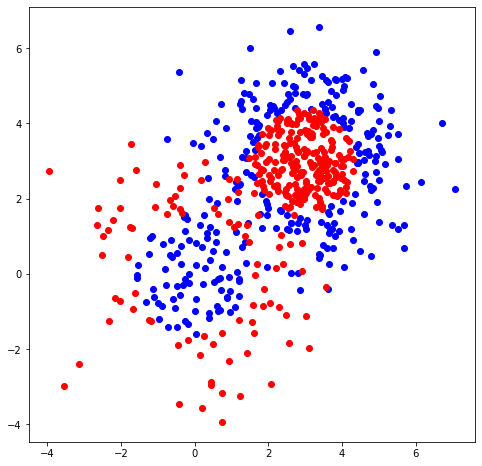

In [20]:
def gen_data(seed):
    X1, y1 = datasets.make_gaussian_quantiles(cov=2.,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=seed)
    X2, y2 = datasets.make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=700, n_features=2,
                                 n_classes=2, random_state=seed)
    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, - y2 + 1))
    y = 2*y-1
    X, y = shuffle(X, y)
    return X, y

X,y = gen_data(1)
Xtest,X = np.split(X,[400])
ytest,y = np.split(y,[400])

Xblue = X[y==-1]
Xred = X[y==1]
plt.figure(figsize=(8,8))
plt.scatter(Xblue[:,0],Xblue[:,1],c='b')
plt.scatter(Xred[:,0],Xred[:,1],c='r');

In [21]:
def plot_decision_boundary(f,X,y):
    plot_step = 0.02
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, plot_step), np.arange(x1_min, x1_max, plot_step))
    yypred = f.predict(np.c_[xx0.ravel(),xx1.ravel()])
    yypred = yypred.reshape(xx0.shape)
    plt.figure()
    plt.contourf(xx0, xx1, yypred, cmap=plt.cm.Paired)
    y_pred = f.predict(X)
    Xblue_good = X[np.equal(y,-1)*np.equal(y,y_pred)]
    Xblue_bad  = X[np.equal(y,-1)*np.not_equal(y,y_pred)]
    Xred_good  = X[np.equal(y,1)*np.equal(y,y_pred)]
    Xred_bad   = X[np.equal(y,1)*np.not_equal(y,y_pred)]
    plt.scatter(Xblue_good[:,0],Xblue_good[:,1],c='b')
    plt.scatter(Xblue_bad[:,0],Xblue_bad[:,1],c='c',marker='v')
    plt.scatter(Xred_good[:,0],Xred_good[:,1],c='r')
    plt.scatter(Xred_bad[:,0],Xred_bad[:,1],c='m',marker='v')
    plt.show()

Generalization error: 0.06


<Figure size 432x288 with 0 Axes>

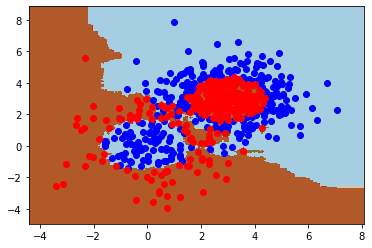

In [22]:
### Generate data
X,y = gen_data(1)
Xtest,X = np.split(X,[400])
ytest,y = np.split(y,[400])

et = ExtraTreesClassifier(n_estimators=101, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=False)
et.fit(X,y)

# Plot
print("Generalization error: %g"%(1.-et.score(Xtest,ytest)))
plt.figure()
plot_decision_boundary(et,X,y)

For comparison, the classification provided by random forest on the same dataset is shown as below:
<img src="image/RF-2D-classification.png">

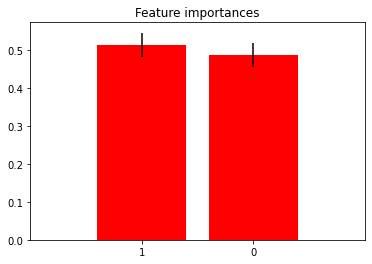

In [23]:
# Feature importance
importances = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in et.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Similar to the random forest algorithm, **feature importance mechanism** remains to be efficient for extremely randomized trees. When training a tree, we can compute how much each feature contributes to decreasing the weighted impurity.

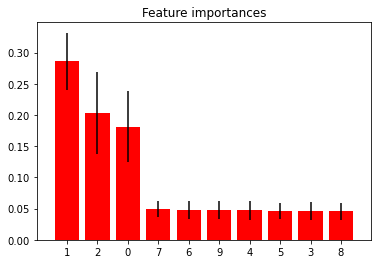

In [24]:
# A more demonstrative example
# Build a classification task using 10 features but only 3 informative ones.
X, y = datasets.make_classification(n_samples=1000,
                                    n_features=10,
                                    n_informative=3,
                                    n_redundant=0,
                                    n_repeated=0,
                                    n_classes=2,
                                    random_state=0,
                                    shuffle=False)
et = ExtraTreesClassifier(n_estimators=101, criterion='entropy')
et.fit(X,y)
importances = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in et.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

As we have seen in this section, Extra Trees can provide a pretty accurate prediction in the classification problem, even with default settings. For regression problem, Extra Trees can also provide a relatively good prediction. Here we will implement Extra Trees Regressor to a predefined dataset in Sklearn.

In [25]:
### test regression dataset
# define dataset
X, y = make_regression(n_samples=1000, n_features=30, n_informative=20, noise=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, shuffle=True)

# summarize the dataset
print(X.shape, y.shape)

(1000, 30) (1000,)


In [26]:
%%time
etr = ExtraTreesRegressor(n_estimators=101, criterion='mse')
etr.fit(X_train, y_train)
print(f'The R2 score on train dataset for extra trees: {etr.score(X_train, y_train)}')
print(f'The R2 score on test dataset for extra trees: {etr.score(X_test, y_test)}')

The R2 score on train dataset for extra trees: 1.0
The R2 score on test dataset for extra trees: 0.7150256194250065
CPU times: user 452 ms, sys: 9.49 ms, total: 462 ms
Wall time: 465 ms


In [27]:
%%time
rfr = RandomForestRegressor(n_estimators=101, criterion='mse')
rfr.fit(X_train, y_train)
print(f'The R2 score on train dataset for random forest: {rfr.score(X_train, y_train)}')
print(f'The R2 score on test dataset for random forest: {rfr.score(X_test, y_test)}')

The R2 score on train dataset for random forest: 0.9524559568710561
The R2 score on test dataset for random forest: 0.6746812629525933
CPU times: user 873 ms, sys: 16.1 ms, total: 889 ms
Wall time: 976 ms


In [28]:
%%time
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)
print(f'The R2 score on train dataset for simple decision tree: {dtr.score(X_train, y_train)}')
print(f'The R2 score on test dataset for simple decision tree: {dtr.score(X_test, y_test)}')

The R2 score on train dataset for simple decision tree: 1.0
The R2 score on test dataset for simple decision tree: 0.10150877554569848
CPU times: user 17.1 ms, sys: 2.5 ms, total: 19.6 ms
Wall time: 19.1 ms


To provide some intuitions on performance and time complexity of extremely randomized trees, we compared it with random forest and simple decision tree. For two tree-based ensemble methods, the number of estimators chosen is the same, meaning two models contain the same number of trees. The function to measure the quality of a split is mean square error (MSE). We measure the time consumed for the training and evaluation for each model and the scores $R^2$ are provided for each algorithm on test dataset. 

As we can see from results, in terms of accuracy, the random forest and the extra trees provide similar scores for test dataset. But for train dataset, as extra trees don't use bootstrap strategy, $R^2$ equals to 1 showing a no-bias learning on the dataset, in contrary to random forest. The latter method uses bootstrap, having some samples left unseen by the model. 

In a simple decision tree, we see no bias on the training set ($R^2=1$). However, the phenomenon of overfitting is clearly demonstrated by the poor score on the test set. 

Thus, the averaging methods like random forest or extra trees can significantly improve the accuracy of prediction by reducing variance. 

In terms of time complexity, as we have seen in the above section, extra trees are expected to be more efficient than random forest for its random selection of split rather than searching for a local optimal. It is shown explicitly in the above regression example. The extra trees regressor consumes less time than random forest regressor. As 101 trees are generated for these two models, they take more time than a simple decision tree.

The above example is only for getting an intuition in a pretty simple way. A more complete and rigorous comparison of different tree-based algorithms can be found in section 2.2 of [[Geurts, 2006](https://link.springer.com/article/10.1007/s10994-006-6226-1)].

# <a id="sec4"></a> 4. Examples 

After getting the theoretical knowledge and performance intuition of extremely randomized trees, let's see some real examples! 

In this section, two examples that we have used during the AML course are implemented to facilitate the comparison with other algorithms.

## <a id="sec4-1"></a> 4.1 Spam or ham?

In [43]:
import load_spam
spam_data = load_spam.spam_data_loader()
spam_data.load_data()
print("data loaded")

Xtrain, ytrain, Xtest, ytest = spam_data.split(2000)

data loaded


In [44]:
Xtrain.shape

(2000, 14279)

<div class="alert alert-warning">
    
**Exercise:**<br>
Your turn to play: let's build a spam classifier using the ling-spam dataset and an extremely randomized trees classifier. Compute it's score on the validation dataset below. You may use the class [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) available in sklearn library.
</div>

In [45]:
# %load solutions/code1.py
spam_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
spam_ET.fit(Xtrain,ytrain)

spam_ET.score(Xtest.toarray(),ytest)

# Compute cross-validation score
nb_trials = 20
score = []
for i in range(nb_trials):
    Xtrain, ytrain, Xtest, ytest = spam_data.shuffle_and_split(2000)
    spam_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
    spam_ET.fit(Xtrain,ytrain);
    score += [spam_ET.score(Xtest,ytest)]
    print('*', end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))


******************** done!
Average generalization score: 0.9744120940649497
Standard deviation: 0.00448313104615588


Then let's evaluate how the same Extra-Trees classifier trained on raw word counts performs.

In [46]:
Xtrain, ytrain, Xtest, ytest = spam_data.split(2000, feat='wordcount')

In [48]:
# %load solutions/code2.py
spam_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
spam_ET.fit(Xtrain,ytrain)

spam_ET.score(Xtest.toarray(),ytest)

# Compute cross-validation score
nb_trials = 20
score = []
for i in range(nb_trials):
    Xtrain, ytrain, Xtest, ytest = spam_data.shuffle_and_split(2000, feat='wordcount')
    spam_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
    spam_ET.fit(Xtrain,ytrain);
    score += [spam_ET.score(Xtest,ytest)]
    print('*', end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))


******************** done!
Average generalization score: 0.9797872340425533
Standard deviation: 0.005210176254729808


What to see know which emails are misclassified?

In [49]:
# Find misclassified examples
ypredict = spam_ET.predict(Xtest)
misclass = np.not_equal(ypredict, ytest)
Xmisclass = Xtest[misclass,:]
ymisclass = ytest[misclass]
misclass_indices = [i for i, j in enumerate(misclass) if j == True]
print("Misclassified messages indices:", misclass_indices)

Misclassified messages indices: [40, 87, 127, 140, 165, 169, 264, 310, 418, 434, 456, 466, 487, 490, 528, 585, 621, 658, 682, 733, 743, 750, 786, 818]


Let's check the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) for this classification.

In [50]:
print("Confusion matrix:")
print(confusion_matrix(ytest, ypredict))

Confusion matrix:
[[745   1]
 [ 23 124]]


In [51]:
# Check some misclassified mails
index = misclass_indices[0]+2000
print("Prediction:", spam_ET.predict(spam_data.tfidf[index,:]))
spam_data.print_email(index)

Prediction: [False]
email file: data/lingspam_public/bare/part1/3-405msg4.txt
email is a spam: False
Subject: re : 3 . 402 queries : language - speakers , syntax , texts

about " who speaks languages " : on the one hand i ' m just as frustrated as most linguists with the question " how many languages do you speak " , but on the other hand i think it 's vastly incorrect to say " linguists are concerned only with formalized grammars and symbol systems " . the fact that some of us * are n't * concerned primarily with these issues is why the recent discussion on rules is for us so baffling . there are still some of us who are concerned with very good description of languages and language . not that writing grammars or dictionaries will get us grad students jobs . . . but there are a good number of us who are both fluent in contemporary theory and comfortable with large amounts of detailed language data . sometimes we speak one or more of the languages we ' re studying ; often we learn * ab

## <a id="sec4-2"></a> 4.2 NIST?

Let's evaluate Extra Trees on the optical character recognition task of the NIST data.

(1797, 64)
(1797, 8, 8)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


<Figure size 432x288 with 0 Axes>

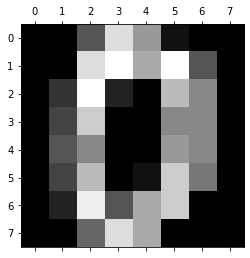

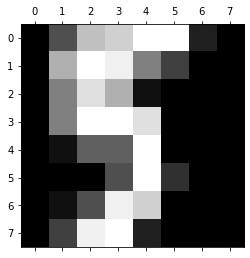

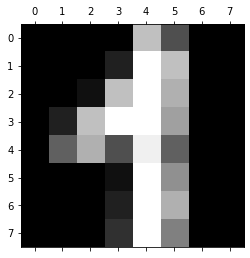

In [33]:
digits = datasets.load_digits()
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)
print(digits.target_names)

X = digits.data
y = digits.target
Xtrain,Xtest = np.split(X,[1000])
ytrain,ytest = np.split(y,[1000])
plt.gray();
plt.matshow(digits.images[0]);
plt.show();
plt.matshow(digits.images[15]);
plt.show();
plt.matshow(digits.images[42]);
plt.show();

def shuffle_and_split(X,y,n):
    X0,y0 = shuffle(X,y)
    Xtrain,Xtest = np.split(X0,[n])
    ytrain,ytest = np.split(y0,[n])
    return Xtrain, ytrain, Xtest, ytest

In [34]:
print(Xtrain.shape)
print(ytrain.shape)

digits_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
digits_ET.fit(Xtrain,ytrain)
prediction = digits_ET.predict(Xtest)
print("Training error:", np.sum(np.not_equal(prediction,ytest))/len(ytest))
print("Generalization error:", np.sum(np.not_equal(prediction,ytest))/len(ytest) )
print("Generalization score:", digits_ET.score(Xtest,ytest))
print("Confusion matrix:")
print(confusion_matrix(ytest, prediction))

(1000, 64)
(1000,)
Training error: 0.05144291091593475
Generalization error: 0.05144291091593475
Generalization score: 0.9485570890840652
Confusion matrix:
[[78  0  0  0  1  0  0  0  0  0]
 [ 0 75  0  1  0  1  0  0  0  3]
 [ 1  0 71  3  0  0  0  0  0  2]
 [ 0  0  0 67  0  3  0  3  6  0]
 [ 0  0  0  0 79  0  0  2  0  2]
 [ 0  0  0  0  0 81  1  0  0  0]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0]
 [ 0  2  1  0  1  3  0  1 68  0]
 [ 0  0  0  0  0  2  0  0  1 78]]


In [35]:
# Compute cross-validation score
nb_trials = 20
score = []
for i in range(nb_trials):
    Xtrain, ytrain, Xtest, ytest = shuffle_and_split(X,y,1000)
    digits_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
    digits_ET.fit(Xtrain,ytrain)
    score += [digits_ET.score(Xtest,ytest)]
    print('*',end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))

******************** done!
Average generalization score: 0.9788582183186951
Standard deviation: 0.005739847499619261


Let's identify which are the misclassified images.

In [36]:
# Retrain
Xtrain = X[:1000,:]
ytrain = y[:1000]
Xtest = X[1000:,:]
ytest = y[1000:]
digits_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
digits_ET.fit(Xtrain,ytrain);

<Figure size 432x288 with 0 Axes>

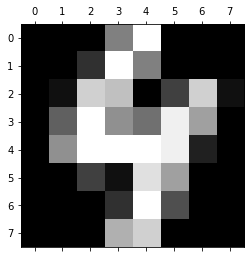

prediction on image number 1053 : [4]
correct label                : 4


In [37]:
# Example
N = 1053 # change N to check the prediction for a specific sample
plt.gray();
plt.matshow(digits.images[N]) 
plt.show() 
x = digits.data[N,:]
print("prediction on image number", N, ":", digits_ET.predict([digits.data[N,:]]))
print("correct label                :", digits.target[N])

In [38]:
# Find misclassified examples
ypredict = digits_ET.predict(Xtest)
misclass = np.not_equal(ypredict, ytest)
Itest = digits.images[1000:,:]
Xmisclass = Xtest[misclass,:]
ymisclass = ytest[misclass]
Imisclass = Itest[misclass,:]

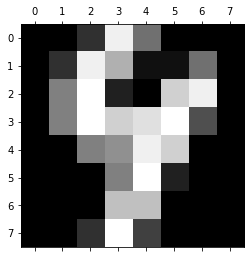

prediction on image number 1 : [9]
correct label                : 4


In [39]:
# Display misclassified examples
N = 1
plt.matshow(Imisclass[N]) 
plt.show() 
print("prediction on image number", N, ":", digits_ET.predict([Xmisclass[N,:]]))
print("correct label                :", ymisclass[N])

Which pixels are important? Let's answer this question by introducing feature importance provided in a tree-based algorithm.

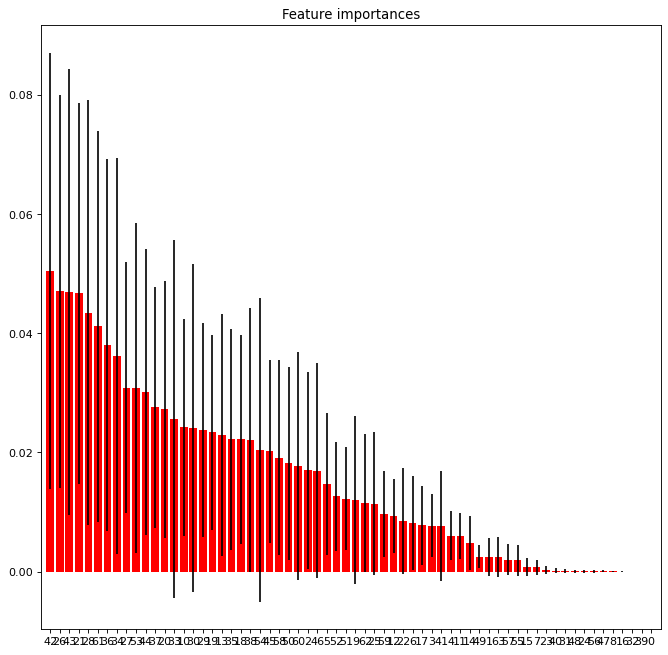

In [40]:
importances = digits_ET.feature_importances_
std = np.std([tree.feature_importances_ for tree in digits_ET.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

A more direct visualization of pixel importance:

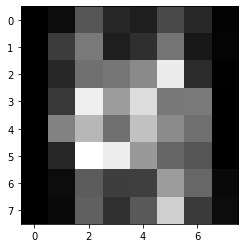

In [41]:
importances_image = importances.reshape((8,8))
plt.imshow(importances_image);

# <a id="sec5"></a> 5. Important facts to remember

Extremely Randomized Trees: a tree-based ensemble method for supervised classification and regression problems.

+ All the data available in the training set are used to grow each tree.
+ To form the root node or any node, the best split is determined by searching in a subset of randomly selected features. The split of each selected feature is chosen at random.

Performances:
+ Pretty good accuracy with lower variance than random forest and decision trees.
+ Less computationally expensive than a Random Forest.

Hope extremely randomized trees algorithm is clear enough for you by now. The following section is optional. You may stop here if you wish. ;) 

# <a id="sec6"></a> 6. More about parameter regularization (optional) 

In this section, the main parameters are discussed to provide more information on how to regularize them and to illustrate the choice of default parameter values. In addition to the number $M$ of trees generated, which is a common one of all ensemble methods, the main parameter, called $K$, controls the strength of the attribute randomization. The secondary parameter, called $n_{min}$, controls the degree of smoothing.

## 6.1 Attribute selection strength $K$

This parameter denotes the number of attributes chosen at each node to develop Extra-Trees. It may vary from $1$ to $n$, where $n$ is the total number of attributes. The randomization of the trees becomes stronger when $K$ becomes smaller. For instance, for $K=1$, the splits (attributes and cut-points) are chosen in a total independent way of the output variable. This extreme case is also called *totally randomized trees*. On the contrary, if $K=n$, the attribute choice is not randomized anymore, only the choice of cut-points remains to be randomized. 

A simplified experimental analysis is conducted here, the following implementation is inspired from [a blog by Jason Brownlee](https://machinelearningmastery.com/extra-trees-ensemble-with-python/):


>1 0.894 (0.035)
>2 0.897 (0.033)
>3 0.900 (0.034)
>4 0.909 (0.028)
>5 0.906 (0.030)
>6 0.903 (0.029)
>7 0.903 (0.033)
>8 0.904 (0.031)
>9 0.904 (0.036)
>10 0.906 (0.031)
>11 0.906 (0.031)
>12 0.910 (0.032)
>13 0.910 (0.031)
>14 0.905 (0.031)
>15 0.908 (0.032)
>16 0.904 (0.033)
>17 0.907 (0.030)
>18 0.904 (0.032)
>19 0.907 (0.034)
>20 0.906 (0.034)


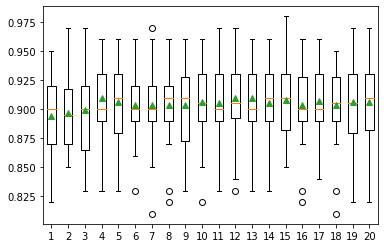

In [15]:
# explore extra trees number of features effect on performance
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore number of features from 1 to 20
    for i in range(1, 21):
        models[str(i)] = ExtraTreesClassifier(max_features=i, random_state=21)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

This implementation uses a repeated stratified k-fold cross-validation to evaluate the model. Models are created by varying $K$. Due to the stochastic characteristics of the algorithm, the results obtained will vary. As we can see from the result, the default setting which is $K=\sqrt{20}\approx4$ performs well.

## 6.2 Smoothing strength $n_{min}$

The second parameter is the number $n_{min}$ of samples required for splitting a node. The tree is larger when $n_{min}$ is large, the bias is relatively large, and the variance is relatively small. The optimal value depends on the level of output noise in the dataset.

A similar implementation is carried out for $n_{min}$:

>2 0.907 (0.031)
>3 0.904 (0.034)
>4 0.901 (0.036)
>5 0.904 (0.031)
>6 0.899 (0.032)
>7 0.896 (0.032)
>8 0.899 (0.032)
>9 0.894 (0.032)
>10 0.897 (0.031)
>11 0.892 (0.032)
>12 0.888 (0.031)
>13 0.885 (0.037)
>14 0.888 (0.032)


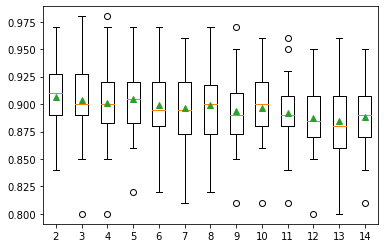

In [17]:
def get_models():
    models = dict()
    # explore the number of samples per split from 2 to 14
    for i in range(2, 15):
        models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
    return models

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

As shown in the result, small values bring better performance, confirming the default setting of 2.

## 6.3 Averaging strength $M$

This parameter denotes the number of trees in the ensemble. In principle, the accuracy is better when $M$ is large. The choice needs to be done in order to find a compromise between accuracy and computational cost.

We carry an implementation to prove the fact above:

>10 0.852 (0.038)
>50 0.900 (0.031)
>100 0.904 (0.033)
>500 0.907 (0.031)
>1000 0.905 (0.031)
>5000 0.907 (0.031)


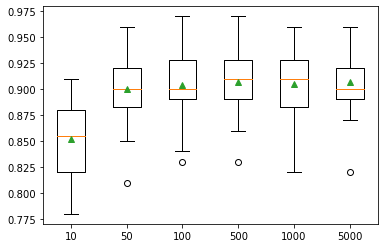

In [18]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

The above implementation illustrates well the fact that the accuracy increase when $K$ increases, and of course the computation takes more time.